## *Importando bibliotecas*

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# `Aula 1: Conhecendo o Matplotlib`

### 1.1 Conhecendo os Dados

In [50]:
df = pd.read_csv(
    "arquivos/imigrantes_canada.csv",
    sep=","
)
df

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

##### Minha análise

<Axes: xlabel='Ano', ylabel='No_Imigrantes'>

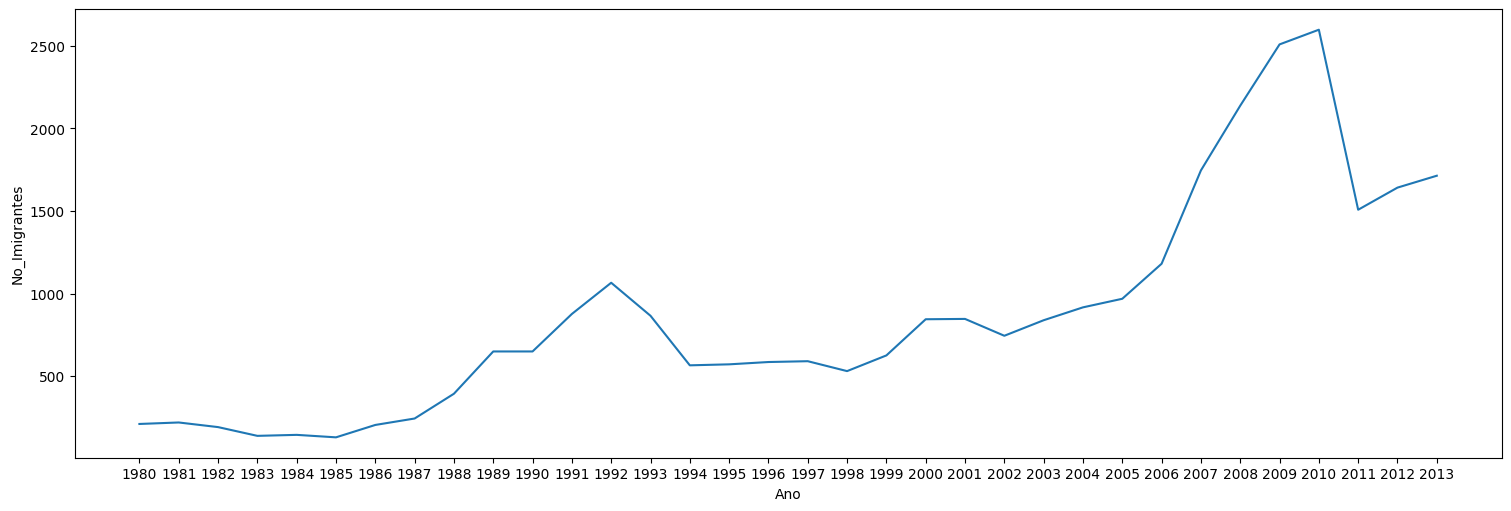

In [52]:
# Analisando tendências de imigração do Brasil 

# filtrando apenas o Brasil
imigracao_br = df.query("País == 'Brasil'")

# filtrando apenas as colunas e linhas desejadas. Também estou resentando o index aqui
imigracao_br = imigracao_br.iloc[0, 3:37].reset_index()

# Dando nome às colunas
imigracao_br.columns = ["Ano", "No_Imigrantes"]

# plotando gráfico
plt.figure(
    figsize=(15, 5),
    constrained_layout=True
)
sns.lineplot(
    data=imigracao_br,
    x='Ano',
    y='No_Imigrantes'
)



##### Análise do curso

In [53]:
# Definindo a coluna "País" como index do DataFrame
df_1 = df.set_index("País")

# Criando uma lista com as respectivas colunas dos anos que aparecem no DataFrame
anos = list(map(str, range(1980, 2014)))

# Criando uma Series que contenha as informações das colunas com anos do DataFrame
brasil = df_1.loc['Brasil', anos].to_frame().reset_index()
brasil.columns = ["ano", "imigrantes"]
brasil


,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


### 1.2 Criando o Primeiro Gráfico com Matplotlib

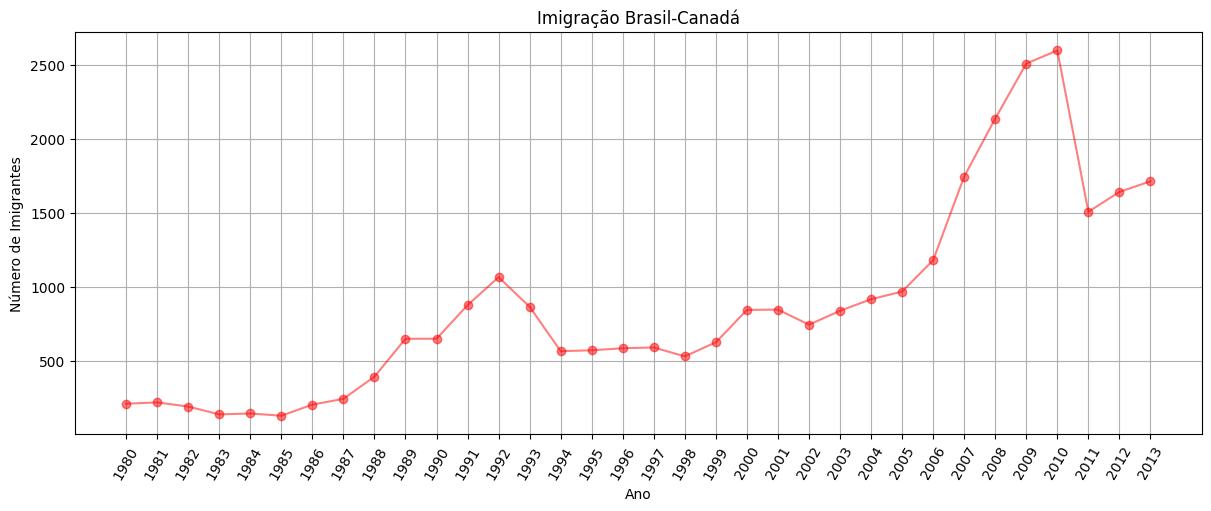

In [54]:

# Configura o tamanho da figura e ajusta automaticamente o layout
plt.figure(
    figsize=(12, 5),            # Define o tamanho da figura (largura x altura)
    constrained_layout=True     # Ajusta automaticamente os elementos do layout para evitar sobreposição
)

# Títulos do gráfico
plt.title("Imigração Brasil-Canadá")
plt.xlabel("Ano")
plt.ylabel("Número de Imigrantes")

# Plota os dados de imigração ao longo dos anos
plt.plot(
    brasil['ano'],              # Dados para o eixo x (anos)
    brasil['imigrantes'],       # Dados para o eixo y (número de imigrantes)
    color='red',                # Define a cor da linha como vermelha
    linewidth=1.5,              # Define a espessura da linha
    alpha=0.5,                  # Define a transparência da linha (50% opaco)
    linestyle='-',              # Define o estilo da linha como sólida
    marker='o'                  # Define o marcador de pontos como círculos
)

# Configura os rótulos do eixo x
plt.xticks(
    ticks=brasil['ano'],        # Define as posições dos rótulos no eixo x
    rotation=60                 # Rotaciona os rótulos do eixo x em 30 graus para melhor legibilidade
)

# Adiciona uma grade ao gráfico para facilitar a visualização dos dados
plt.grid(True)

# Exibe o gráfico na tela
plt.show()


### 1.3 Imigrantes Brasil x Argentina para o Canadá

##### Minha solução

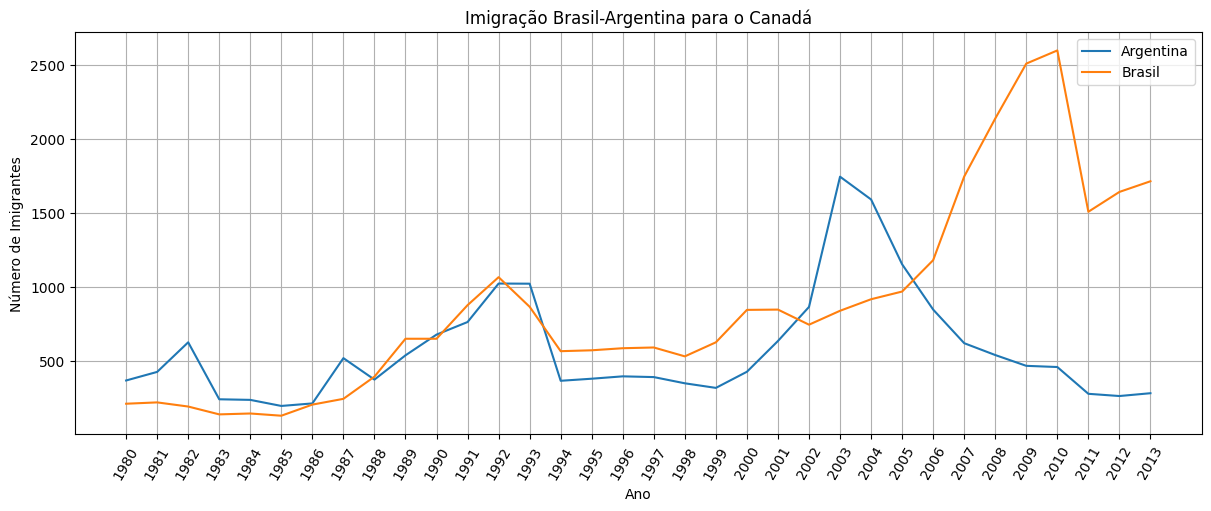

In [55]:
imigracao_br_ar = df.query("País == 'Brasil' or País == 'Argentina'")

imigracao_br_ar = imigracao_br_ar.iloc[0:2, 3:37].T.reset_index()

imigracao_br_ar.columns = ['Ano', 'Argentina', 'Brasil']

plt.figure(
    figsize=(12, 5),
    constrained_layout=True
)

plt.title("Imigração Brasil-Argentina para o Canadá")
plt.xlabel("Ano")
plt.ylabel("Número de Imigrantes")

plt.grid(True)

sns.lineplot(
    imigracao_br_ar,
    x='Ano',
    y='Argentina',
    label='Argentina',
    markers=True
)
sns.lineplot(
    imigracao_br_ar,
    x='Ano',
    y='Brasil',
    label='Brasil',
    markers=True
)

plt.xticks(
    ticks=imigracao_br_ar['Ano'],
    rotation=60
)

plt.show()

##### Resolução do curso

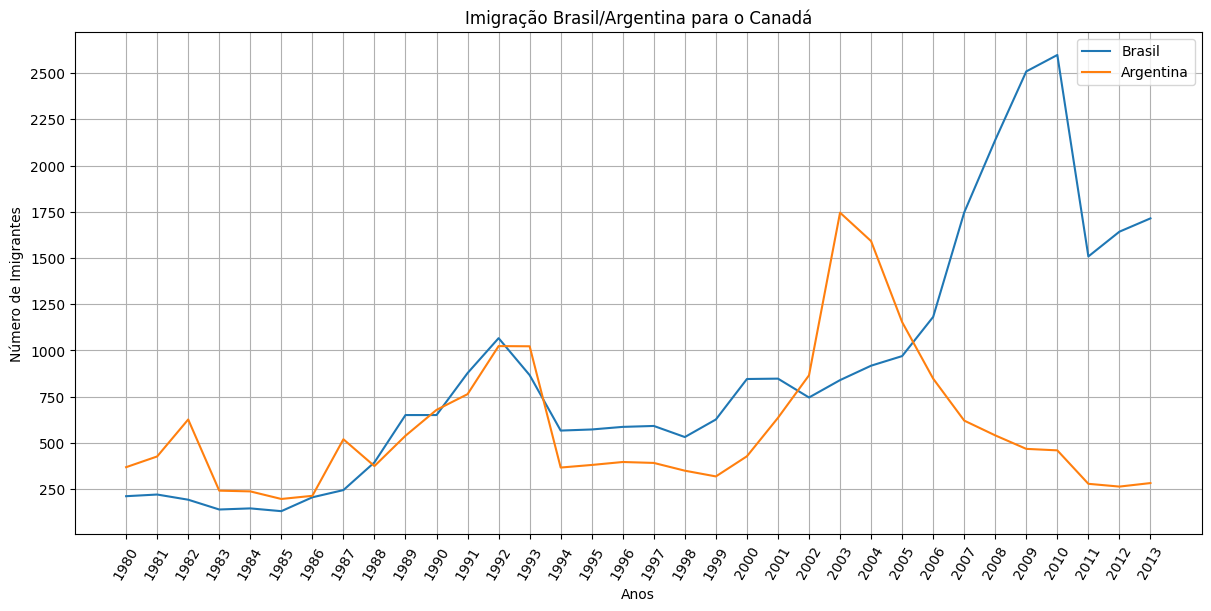

In [94]:
# Extraindo apenas as informações referentes ao Brasil e Argentina
df_comparacao = df_1.loc[['Brasil', 'Argentina'], anos]
df_comparacao = df_comparacao.T.reset_index()
df_comparacao.columns = ['anos', 'brasil', 'argentina']
df_comparacao

plt.figure(
    figsize=(12, 6),
    constrained_layout=True,
)

plt.title("Imigração Brasil/Argentina para o Canadá")
plt.xlabel("Anos")
plt.ylabel("Número de Imigrantes")

plt.xticks(rotation=60)
plt.yticks(ticks=list(range(250, 3000, 250)))

plt.grid(True)

plt.plot(
    df_comparacao['anos'],
    df_comparacao['brasil'],
    label='Brasil'
)
plt.plot(
    df_comparacao['anos'],
    df_comparacao['argentina'],
    label='Argentina'
)

plt.legend()
plt.show()